In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D,GlobalMaxPooling1D,MaxPooling1D
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Bidirectional, LSTM, Dropout, BatchNormalization,CuDNNLSTM
import re    #for regex
import seaborn as sns
import matplotlib.pyplot as plt
import string
from tensorflow import keras
import re    #for regex
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Conv1D, GlobalMaxPooling1D,SpatialDropout1D,GlobalAveragePooling1D, LSTM, SimpleRNN

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TengkaiGao\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
train = pd.read_csv('G:/toxic_detector_final_4.csv',usecols =["comment_text","Toxic"])

In [3]:
train.dtypes

comment_text    object
Toxic            int64
dtype: object

In [4]:
train

,comment_text,Toxic
0,They were warning SantiLak in August. Notice ...,0
1,one last comment \n\nI notice there is a stron...,0
2,Fair point. Thanks.66.87.143.199,0
3,Yes there is almost total overlap71.208.252.27,0
4,Stop Wiki-stalking me \nSome of my changes wer...,0
...,...,...
43459,new mutants putlocker” about to be the #1 goog...,1
43460,It was better than the New Mutants. There were...,1
43461,Whenever I THINK that I’m TRULY Fast & Furious...,1
43462,My man wasn't to happy I left on this Harley D...,1


In [5]:
train.dropna(axis=0,how="any")

,comment_text,Toxic
0,They were warning SantiLak in August. Notice ...,0
1,one last comment \n\nI notice there is a stron...,0
2,Fair point. Thanks.66.87.143.199,0
3,Yes there is almost total overlap71.208.252.27,0
4,Stop Wiki-stalking me \nSome of my changes wer...,0
...,...,...
43459,new mutants putlocker” about to be the #1 goog...,1
43460,It was better than the New Mutants. There were...,1
43461,Whenever I THINK that I’m TRULY Fast & Furious...,1
43462,My man wasn't to happy I left on this Harley D...,1


In [6]:
train['comment_text'] = pd.DataFrame(train["comment_text"].astype('str')) 

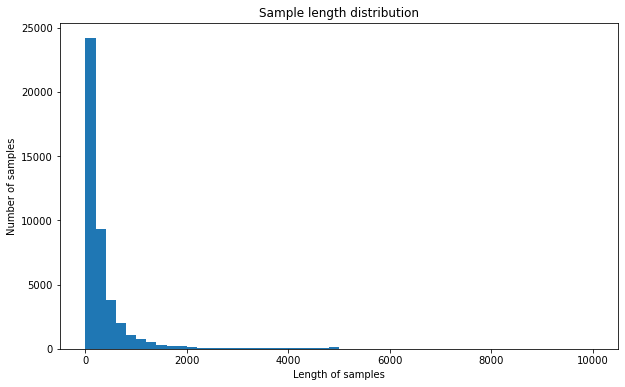

In [7]:
# Now, let's see the average number of words per sample
plt.figure(figsize=(10, 6))
plt.hist([len(sample) for sample in list(train['comment_text'])], 50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.show()

In [8]:
num_duplicates = train.duplicated().sum() #identify duplicates
print('There are {} duplicate reviews present in the dataset'.format(num_duplicates))

There are 0 duplicate reviews present in the dataset


In [9]:
train.drop_duplicates(inplace = True)

In [10]:
train.shape

(43464, 2)

In [11]:
train

,comment_text,Toxic
0,They were warning SantiLak in August. Notice ...,0
1,one last comment \n\nI notice there is a stron...,0
2,Fair point. Thanks.66.87.143.199,0
3,Yes there is almost total overlap71.208.252.27,0
4,Stop Wiki-stalking me \nSome of my changes wer...,0
...,...,...
43459,new mutants putlocker” about to be the #1 goog...,1
43460,It was better than the New Mutants. There were...,1
43461,Whenever I THINK that I’m TRULY Fast & Furious...,1
43462,My man wasn't to happy I left on this Harley D...,1


In [12]:
train=train.reset_index(drop=True)

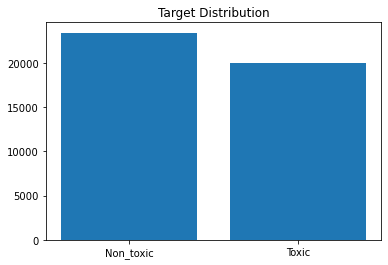

In [13]:
target_count = train.groupby('Toxic').size().reset_index(name='counts')
plt.bar(target_count.Toxic, target_count.counts)
plt.xticks([0,1], labels=["Non_toxic", "Toxic"])
plt.title("Target Distribution")
plt.show()

In [14]:
sum(train["Toxic"]==0)

23425

In [15]:
sum(train["Toxic"]==1)

20039

In [16]:
clean = {
"aren't" : "are not",
"can't" : "can not",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [17]:
#defining a function to clean the data
#标点符号需要处理
def clean_text(text):
    
    text = text.lower()
    text = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', '', text) # clean url
    text = re.sub(r'#(\w+)', '', text)   # clean hashes
    text = re.sub(r'@(\w+)', '', text)   # clean @
    text = re.sub(r'<[^>]+>', '', text)  # clean tags
    text = re.sub(r'\d+', '', text)      # clean digits
    text = [APPO[word] if word in clean else word for word in text.split()] 
    
   
    
    return text

In [18]:
train['comment_text_clean'] = train['comment_text'].apply(lambda x: clean_text(x))

In [19]:
x=train["comment_text_clean"]
y=train["Toxic"]

In [20]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=1,shuffle=True)

In [21]:
max_feature = 10000
tokenizer = tf.keras.preprocessing.text.Tokenizer(max_feature,
                                                  lower= True,
                                                  filters= '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                  split = " ")

tokenizer.fit_on_texts(train_x)

In [22]:
sequences = tokenizer.texts_to_sequences(train_x)

In [23]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 500)

In [24]:
test_x_tokenized=tokenizer.texts_to_sequences(test_x)
x_testing=tf.keras.preprocessing.sequence.pad_sequences(test_x_tokenized,maxlen=500)

In [25]:
word_index = tokenizer.word_index

In [26]:
word_index 

{'the': 1,
 'you': 2,
 'to': 3,
 'a': 4,
 'i': 5,
 'and': 6,
 'of': 7,
 'is': 8,
 'that': 9,
 'in': 10,
 'it': 11,
 'for': 12,
 'your': 13,
 'are': 14,
 'this': 15,
 'not': 16,
 'on': 17,
 'be': 18,
 'have': 19,
 '"': 20,
 'as': 21,
 'fuck': 22,
 'my': 23,
 'with': 24,
 'if': 25,
 'was': 26,
 'or': 27,
 'an': 28,
 'but': 29,
 'do': 30,
 'what': 31,
 'me': 32,
 'from': 33,
 'by': 34,
 'about': 35,
 'will': 36,
 'so': 37,
 'can': 38,
 'like': 39,
 'at': 40,
 'all': 41,
 'article': 42,
 'suck': 43,
 'just': 44,
 'am': 45,
 'he': 46,
 'no': 47,
 'do not': 48,
 'they': 49,
 'has': 50,
 'wikipedia': 51,
 'page': 52,
 'who': 53,
 'would': 54,
 'one': 55,
 'there': 56,
 'please': 57,
 'go': 58,
 '-': 59,
 'should': 60,
 'been': 61,
 'some': 62,
 'any': 63,
 'faggot': 64,
 'because': 65,
 'know': 66,
 'we': 67,
 'his': 68,
 'talk': 69,
 'which': 70,
 'get': 71,
 'more': 72,
 'other': 73,
 'how': 74,
 'think': 75,
 'why': 76,
 'i am': 77,
 'people': 78,
 'fucking': 79,
 'up': 80,
 'it is': 81,
 

In [27]:
embeddings_index = {}
with open("G:/glove.6B/glove.6B.100d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [28]:
EMBEDDING_DIM = 100
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [299]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
lstm_model=Sequential()
lstm_model.add(Embedding(len(word_index)+1, #word size
                                    100, #Embedding DIM
                                    weights=[embedding_matrix], #Word Embeddings matrix
                                    trainable=False, 
                                    input_length=500))
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(128))
lstm_model.add(Dropout(0.3))#lstm with 128 neuron
lstm_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(3e-3),metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 100)          13618200  
_________________________________________________________________
dropout_4 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 13,735,577
Trainable params: 117,377
Non-trainable params: 13,618,200
_________________________________________________________________
None


In [300]:
history = lstm_model.fit(x=pad_sequences, y=train_y, batch_size=128, verbose=1, epochs=20,  validation_split= 0.1,shuffle=True)

Epoch 1/20
245/245 [==============================] - 22s 83ms/step - loss: 0.3821 - accuracy: 0.8300 - val_loss: 0.3120 - val_accuracy: 0.8683
Epoch 2/20
245/245 [==============================] - 20s 81ms/step - loss: 0.3229 - accuracy: 0.8596 - val_loss: 0.2838 - val_accuracy: 0.8784
Epoch 3/20
245/245 [==============================] - 20s 80ms/step - loss: 0.2998 - accuracy: 0.8714 - val_loss: 0.2707 - val_accuracy: 0.8830
Epoch 4/20
245/245 [==============================] - 19s 78ms/step - loss: 0.3105 - accuracy: 0.8721 - val_loss: 0.2706 - val_accuracy: 0.8836
Epoch 5/20
245/245 [==============================] - 19s 77ms/step - loss: 0.2754 - accuracy: 0.8835 - val_loss: 0.2649 - val_accuracy: 0.8864
Epoch 6/20
245/245 [==============================] - 19s 76ms/step - loss: 0.2694 - accuracy: 0.8844 - val_loss: 0.2697 - val_accuracy: 0.8818
Epoch 7/20
245/245 [==============================] - 19s 77ms/step - loss: 0.2568 - accuracy: 0.8892 - val_loss: 0.2559 - val_accuracy:

In [301]:
predictions = (lstm_model.predict(x_testing) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Classification report for bag of words 
report=classification_report(test_y,predictions,digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8968    0.9159    0.9063      4708
           1     0.8981    0.8755    0.8867      3985

    accuracy                         0.8974      8693
   macro avg     0.8975    0.8957    0.8965      8693
weighted avg     0.8974    0.8974    0.8973      8693



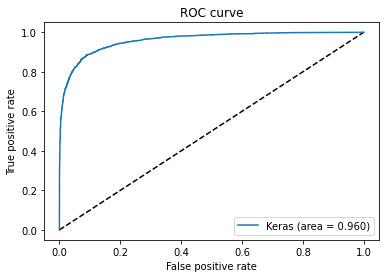

In [302]:
from sklearn.metrics import roc_curve
y_pred_keras =lstm_model.predict(x_testing).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [35]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
bi_model=Sequential()
bi_model.add(Embedding(len(word_index)+1, #Vocablury size
                                    100, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=500))
bi_model.add(Dropout(0.3))
bi_model.add(Bidirectional(CuDNNLSTM(128,return_sequences=True)))
bi_model.add(Dropout(0.3))
bi_model.add(Bidirectional(CuDNNLSTM(128))) #lstm with 100 neurons
bi_model.add(Dropout(0.3))
bi_model.add(Dense(1,activation='sigmoid'))
bi_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(3e-3),metrics=['accuracy'])
print(bi_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 100)          13554500  
_________________________________________________________________
dropout_3 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 500, 256)          235520    
_________________________________________________________________
dropout_4 (Dropout)          (None, 500, 256)          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               395264    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [42]:
callback=keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.005, patience=5, verbose=2, mode='auto', restore_best_weights=True)




In [43]:
history = bi_model.fit(x=pad_sequences, y=train_y, batch_size=128, verbose=1, epochs=20,  validation_split= 0.1,shuffle=True,callbacks=[callback])

Epoch 1/20
242/242 [==============================] - 105s 331ms/step - loss: 0.3900 - accuracy: 0.8260 - val_loss: 0.3028 - val_accuracy: 0.8721
Epoch 2/20
242/242 [==============================] - 79s 327ms/step - loss: 0.3267 - accuracy: 0.8591 - val_loss: 0.2957 - val_accuracy: 0.8742
Epoch 3/20
242/242 [==============================] - 79s 328ms/step - loss: 0.3002 - accuracy: 0.8716 - val_loss: 0.2774 - val_accuracy: 0.8777
Epoch 4/20
242/242 [==============================] - 79s 327ms/step - loss: 0.2822 - accuracy: 0.8799 - val_loss: 0.2715 - val_accuracy: 0.8835
Epoch 5/20
242/242 [==============================] - 79s 328ms/step - loss: 0.2662 - accuracy: 0.8863 - val_loss: 0.2636 - val_accuracy: 0.8846
Epoch 6/20
242/242 [==============================] - 80s 329ms/step - loss: 0.2570 - accuracy: 0.8916 - val_loss: 0.2562 - val_accuracy: 0.8910
Epoch 7/20
242/242 [==============================] - 80s 330ms/step - loss: 0.2501 - accuracy: 0.8954 - val_loss: 0.2562 - val_a

In [44]:
predictions = (bi_model.predict(x_testing) > 0.5).astype("int32")
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Classification report for bag of words 
report=classification_report(test_y,predictions,digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9004    0.8994    0.8999      4762
           1     0.8754    0.8765    0.8760      3839

    accuracy                         0.8892      8601
   macro avg     0.8879    0.8880    0.8879      8601
weighted avg     0.8892    0.8892    0.8892      8601



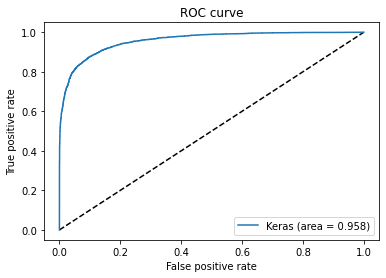

In [45]:
from sklearn.metrics import roc_curve
y_pred_keras =bi_model.predict(x_testing).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [180]:
bi_model.save('week6_1model')

INFO:tensorflow:Assets written to: week6_1model\assets


INFO:tensorflow:Assets written to: week6_1model\assets


In [259]:
from tensorflow.keras.models import load_model 
new_model = tf.keras.models.load_model('week6_1model')

In [62]:
sample_text=["This movie is kind of a mixed bag. There are certain elements of it that I think are creative, but by far it is definitely one of the lesser Marvel films. The only thing I disagree with Martin Scorsese about is that Marvel movies are like theme park rides because there are ones like Endgame, Thor Ragnarok (my personal favourite Marvel movie), Civil War, The Avengers, Infinity War and many others that have a far deeper meaning and much more than just entertainment. Overall, Venom is one of those okay movies that doesn't deserve hate, the scenes where the Venom inside Tom Hardy's character is talking to him are pretty hilarious"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [58]:
sample_text=["Only saw this once or twice - I don't remember - many years ago; haven't been interested in seeing it again since there was a time when I was younger and I slightly enjoyed dumb movies but this went to deep into stupidity. That's about it - nothing good about it just a drag!"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [33]:
sample_text=["I enjoyed watching the movie, but it is obvious from its name and poster that it is a terrible movie. I don't regret watching :)"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [70]:
sample_text=["There seems to be quite a bit of agreement on what Im about to say about the film. Venom doesnt quite know what it is. It cant decide wether its a goofy, action or a horror movie. Therefore its all of it and none at the same time. The goofy jokes are pretty lame, which is why they are funny, you dont laugh with the writers, you laugh at them. The action scenes are meh at best, car chase : check motorcycle : check ridiculous (bad) cgi fight: check sure, watching Tom Hardy motorcross in San Francisco is quite fun, but its not really action. Finally, the horror; there are glimpses, glimmers of hope scattered around this movie. Little snippets of what could have been, but as soon as they appear they disappear. Two scenes really stood out to me due to their potential. After quite a lot of buildup of Venom getting into the building (BY RUNNING UP IT), Eddie decides to take the lift down. Instead of having Eddie walk into the SWAT team, they should have been swarming the building crawling through the floors looking for him. Then, they could have had an ALIEN like hunting scene where Venom slowly takes out the task force one by one, in true horror movie fashion. The other obvious horror scene could have been using the creepy little girl that delivers RIOT to the Musk wannabe, they could have homaged The Shining, they could have pulled an exorcist, they could have done a million things, but the little girl just has white pupils and a deep voice. Throughout the movie there are just continuous disappointments because you see what it is missing. Instead of the cheap love story and all the stupid overdone things they should have been ballsy with their movie. Yes the movie DID make 800+ million, however im sure it was going to do that anyway. Venom is probably one of the most badass characters in comic history, and Tom Hardy is Tom Hardy. I would have loved to see something along these lines: Symbiote hunts Eddie. Symbiote captures Eddie and they become Venom. Venom starts unleashing hell because he can, hunts SWAT etc. Venom goes after Musk wannabe and Kills him. Throw some more horror elements in there, and it would have made for a much more satisfactory watch. I have always adored Venom, and this movie had so much potential, but it was all for nothing. No rewatchability. Nothing worth remembering. Just a flick. It was funny seeing Tom Hardy being a bit of a pussball, but even he cant help a crap script and an even worse film."]
sequences = tokenizer.texts_to_sequences(sample_text)

In [71]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 500)

In [72]:
pad_sequences

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,   56,  267,    3,   18,  386,
           4,  436,    7, 2798,   17,   31,  337,   35,    3,  138,   35,
           1, 1150, 2408,  386,   66,   31,   11,    8,   11,  796,  769,
         121,    4, 1072,   27,    4, 

In [69]:
sample_text=["Started Binging to Catch up and WOW what a PIECE OF CRAP"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [94]:
sample_text=["This latest offering is another disaster yet again from Daniel Craig. Besides his first movie viz. Casino Royale all the rest have been totally useless. It was an absolute burden to sit throught this 2.40 hrs long film. Definitely for me, the James Bond franchise has lost the absolute magical touch it used to have in the days of Sean Connery and Roger"]
sequences = tokenizer.texts_to_sequences(sample_text)

In [104]:
sample_text=[""]
sequences = tokenizer.texts_to_sequences(sample_text)

In [105]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,
                                                             maxlen = 500)

In [101]:
pad_sequences

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [106]:
predictions =bi_model.predict(pad_sequences) 

In [230]:
predictions =new_model.predict(pad_sequences) 

In [107]:
predictions 

array([[0.3310697]], dtype=float32)